In [1]:
import copulas_impl as cop
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("correlation_matrix.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000,-0.156,-0.249,-0.174,-0.193,-0.306,0.214,-0.052,-0.083,0.248,...,-0.099,-0.156,0.156,-0.080,0.222,0.073,-0.231,0.145,-0.132,-0.177
1,-0.156,1.000,0.333,0.102,0.225,0.185,0.198,-0.146,-0.184,0.174,...,-0.054,0.122,-0.123,-0.377,0.184,-0.187,-0.037,0.136,0.179,-0.056
2,-0.249,0.333,1.000,0.225,0.113,0.327,0.126,-0.074,0.045,-0.020,...,-0.068,-0.206,-0.239,-0.106,0.074,-0.135,-0.247,0.035,-0.156,-0.197
3,-0.174,0.102,0.225,1.000,-0.138,-0.116,-0.142,-0.153,0.129,-0.030,...,-0.213,-0.007,0.314,-0.065,-0.083,-0.266,-0.111,0.087,-0.194,-0.068
4,-0.193,0.225,0.113,-0.138,1.000,0.243,0.016,0.300,-0.008,-0.217,...,0.147,0.234,-0.043,-0.260,-0.017,0.100,-0.053,0.113,-0.075,-0.015
5,-0.306,0.185,0.327,-0.116,0.243,1.000,-0.151,0.279,0.175,-0.039,...,-0.027,-0.108,-0.298,0.024,-0.085,-0.179,-0.107,0.109,-0.149,-0.206
6,0.214,0.198,0.126,-0.142,0.016,-0.151,1.000,-0.083,-0.049,0.073,...,0.042,0.278,-0.240,-0.051,0.245,0.087,0.023,0.062,-0.037,0.010
7,-0.052,-0.146,-0.074,-0.153,0.300,0.279,-0.083,1.000,0.121,0.016,...,-0.013,0.054,0.187,-0.109,0.195,-0.271,0.306,0.139,-0.387,-0.168
8,-0.083,-0.184,0.045,0.129,-0.008,0.175,-0.049,0.121,1.000,-0.082,...,0.142,-0.140,-0.114,-0.151,-0.001,-0.095,-0.099,0.129,-0.083,0.004
9,0.248,0.174,-0.020,-0.030,-0.217,-0.039,0.073,0.016,-0.082,1.000,...,-0.062,-0.234,0.171,-0.183,0.091,-0.117,-0.137,0.207,0.001,-0.183


In [10]:
def is_positive_semidefinite(matrix):
    # Calculer les valeurs propres de la matrice
    eigenvalues = np.linalg.eigvalsh(matrix)
    print(eigenvalues)
    # Vérifier si toutes les valeurs propres sont positives ou nulles
    return np.all(eigenvalues >= 0)

is_positive_semidefinite(df)

[0.03883213 0.05002004 0.05115007 0.05163059 0.05227804 0.05265717
 0.05324278 0.05359019 0.05413524 0.05450437 0.05484006 0.0552354
 0.05538649 0.05630728 0.05706759 0.05757476 0.0577119  0.05836468
 0.05943239 0.06017844 0.06204103 0.08797533 0.17553316 0.41980244
 0.43658429 0.49036886 0.72770699 0.83578977 0.8850242  0.96574628
 1.02905114 1.13746193 1.19313823 1.25464527 1.42739649 1.53814493
 1.73953853 1.7974381  1.86278993 1.98343099 2.21164964 2.25285535
 2.46965072 2.71197943 2.80673552 2.86988322 3.15552136 3.25454995
 3.43537584 3.69805143]


np.True_

In [11]:
gaussian_samples = cop.gaussian_copula_sample(df.to_numpy(), 100)

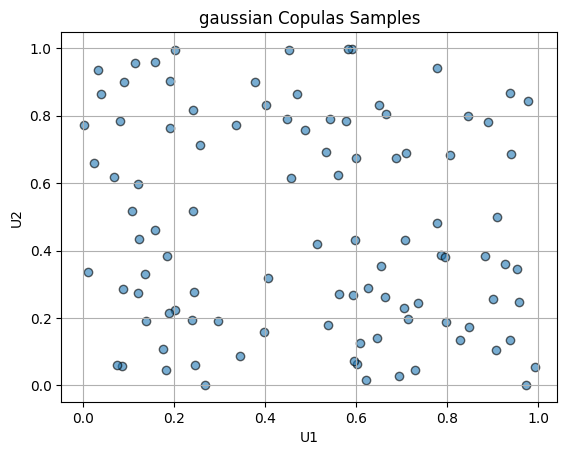

In [12]:
cop.plot_samples(gaussian_samples, "gaussian Copulas Samples")

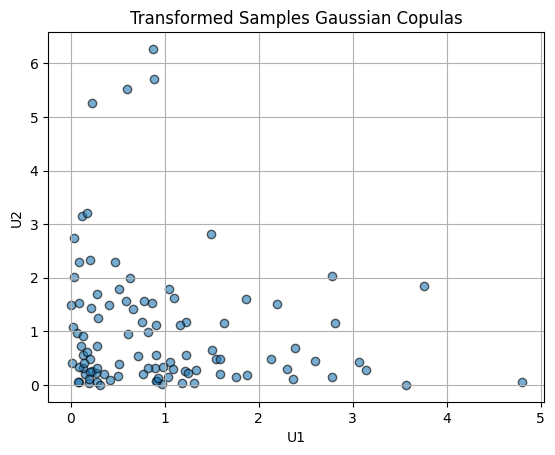

In [13]:
cop.plot_samples(cop.transform_to_exponential(gaussian_samples), "Transformed Samples Gaussian Copulas")

- **Clayton** : Connu pour capturer des dépendances fortes dans les faibles valeurs.
- **Gumbel** : Connu pour capturer des dépendances fortes dans les valeurs élevées.

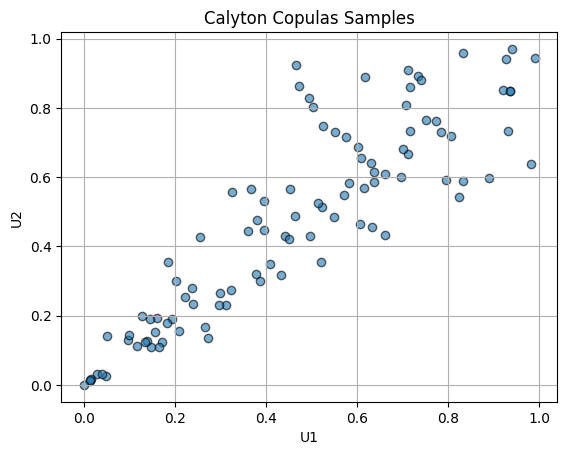

In [14]:
from copulas.bivariate import Clayton, Gumbel

Clayton_samples = cop.archimedean_copula_sample(Clayton, 100)
cop.plot_samples(Clayton_samples, "Calyton Copulas Samples")

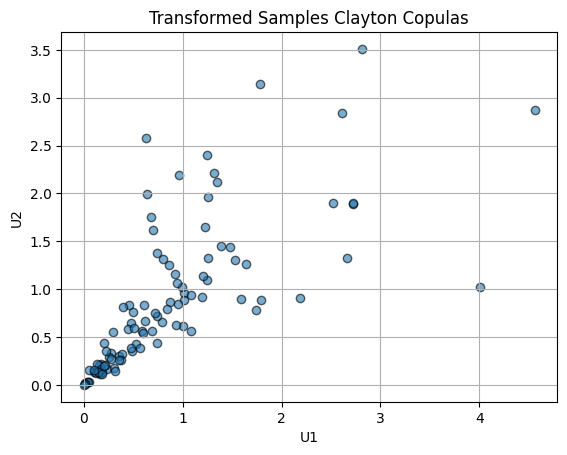

In [15]:
cop.plot_samples(cop.transform_to_exponential(Clayton_samples), "Transformed Samples Clayton Copulas")

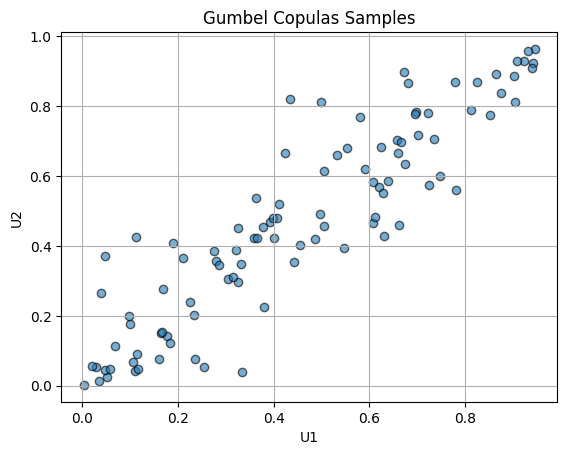

In [16]:
Gumbel_samples = cop.archimedean_copula_sample(Gumbel, 100)
cop.plot_samples(Gumbel_samples, "Gumbel Copulas Samples")

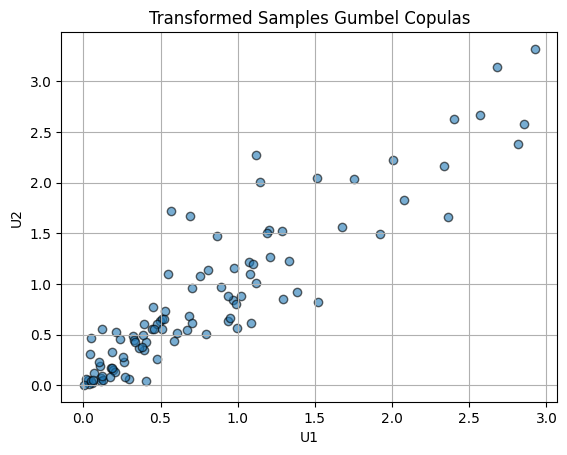

In [17]:
cop.plot_samples(cop.transform_to_exponential(Gumbel_samples), "Transformed Samples Gumbel Copulas")